# <p style="text-align: center;color: blue"> Pet Finder using Machine Learning and Deep Learning </p>
### <p style="text-align: center;color: green"> Prabal Ghosh </p>

#### <p style="text-align: center;"> MSc Data Science & Artificial Intelligence </p>
#### <p style="text-align: center;"> More on Learning Algorithms | Advanced Deep Learning </p> 
#### <p style="text-align: center;"> 15/03/2024 </p>

## Introduction


The dataset presents pet's characteristics and includes tabular, text and image data.
``The aim is to predict the rate at which a pet is adopted.``

Data fields:

``Type`` - Dog or Cat  
``Age`` - Age of pet when listed, in months  
``Gender`` - Gender of pet (Male, Female, Mixed, if profile represents group of pets)  
``Color1`` - Color 1 of pet  
``Color2`` - Color 2 of pet   
``Color3`` - Color 3 of pet   
``MaturitySize`` - Size at maturity (Small, Medium, Large, Extra Large, Not Specified)  
``FurLength`` - Fur length (Short, Medium, Long, Not Specified)  
``Vaccinated`` - Pet has been vaccinated (Yes, No, Not Sure)  
``Dewormed`` - Pet has been dewormed (Yes, No, Not Sure)  
``Sterilized`` - Pet has been spayed / neutered (Yes, No, Not Sure)  
``Health`` - Health Condition (Healthy, Minor Injury, Serious Injury, Not Specified)  
``Fee`` - Adoption fee (0 = Free)  
``Breed`` - breed of pet (see on the dataset)  
``Description`` - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.  
``Image`` - a pointer to an image    
  
``The aim is to predic AdoptionSpeed. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: ``

``0`` - Pet was adopted on the same day as it was listed.   
``1`` - Pet was adopted between 1 and 7 days (1st week) after being listed.   
``2`` - Pet was adopted between 8 and 30 days (1st month) after being listed.   
``3`` - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.   
``4`` - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).  
  
Submissions are scored based on the quadratic weighted kappa, which measures the agreement between two ratings. This metrics exist on sklean: sklearn.metrics.cohen_kappa_score with weights="quadratic".

### References for this project

- Pipeline- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- KNN- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- RandomOverSampler- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
- RandomizedSearchCV- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- https://scikit-learn.org/stable/modules/compose.html
- https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156
- https://towardsdatascience.com/customizing-scikit-learn-pipelines-write-your-own-transformer-fdaaefc5e5d7
-  https://www.youtube.com/watch?v=aijB8qbEOQ4

## Libraries

In [1]:
# Importing required libraries and methods

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import PorterStemmer
from imblearn.over_sampling import SMOTE

from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

import unicodedata

import cv2
from sklearn.cluster import MiniBatchKMeans

#packages
#basics
import os


#modeling
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# Import necessary  Libraries
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pip install opencv

## Dataset Train and Test

In [3]:
# Read train files
df_train = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train.csv")
print("In the dataset they are : ", df_train.shape[0], "train observations")
# df_train.head(1)

In the dataset they are :  9000 train observations


In [4]:
# Read test file
df_test = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test.csv")
print("In the dataset they are : ", df_test.shape[0], "test observations")
# df_test.head(1)

In the dataset they are :  500 test observations


In [5]:
df_train_copy = df_train.copy()
df_train_copy.head(1)

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,4.0,3b178aa59-5.jpg,Terrier


In [6]:
df_test_copy = df_test.copy()
df_test_copy.head(1)

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",5df99d229-2.jpg,Domestic_Short_Hair


###  image path add for train and test data

In [7]:
img_dir = "C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train_images_all\\"
test_img_dir = "C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\"


In [8]:


df_train_copy['Images'] = [img_dir+img for img in df_train_copy['Images']]


In [9]:
df_train_copy['Images'][0]


'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train_images_all\\3b178aa59-5.jpg'

In [10]:
df_test_copy['Images'] = [test_img_dir+img for img in df_test_copy['Images']]


In [11]:
df_test_copy['Images'][0]


'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\5df99d229-2.jpg'

In [12]:
df_train_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           9000 non-null   object 
 1   Age            9000 non-null   float64
 2   Gender         9000 non-null   object 
 3   Color1         9000 non-null   object 
 4   Color2         9000 non-null   object 
 5   Color3         9000 non-null   object 
 6   MaturitySize   9000 non-null   object 
 7   FurLength      9000 non-null   object 
 8   Vaccinated     9000 non-null   object 
 9   Dewormed       9000 non-null   object 
 10  Sterilized     9000 non-null   object 
 11  Health         9000 non-null   object 
 12  Fee            9000 non-null   float64
 13  Description    9000 non-null   object 
 14  AdoptionSpeed  9000 non-null   float64
 15  Images         9000 non-null   object 
 16  Breed          9000 non-null   object 
dtypes: float64(3), object(14)
memory usage: 1.2+ MB


In [13]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          500 non-null    object 
 1   Age           500 non-null    float64
 2   Gender        500 non-null    object 
 3   Color1        500 non-null    object 
 4   Color2        500 non-null    object 
 5   Color3        500 non-null    object 
 6   MaturitySize  500 non-null    object 
 7   FurLength     500 non-null    object 
 8   Vaccinated    500 non-null    object 
 9   Dewormed      500 non-null    object 
 10  Sterilized    500 non-null    object 
 11  Health        500 non-null    object 
 12  Fee           500 non-null    float64
 13  Description   500 non-null    object 
 14  Images        500 non-null    object 
 15  Breed         500 non-null    object 
dtypes: float64(2), object(14)
memory usage: 62.6+ KB


Conclusion:

- **No NAN value present.**

In [14]:
ordered_series = df_train_copy['AdoptionSpeed'].value_counts().sort_index()
print(ordered_series)


AdoptionSpeed
0.0     247
1.0    1894
2.0    2504
3.0    2061
4.0    2294
Name: count, dtype: int64


## Data Visualization

### Train data

#### Color3 Feature has 7055 Unknown values so drop this cloum

In [15]:
df_train_copy.Color3.value_counts()


Color3
Unknown    7055
White      1451
Cream       186
Gray        146
Yellow       88
Golden       74
Name: count, dtype: int64

**Color3 will be dropped as 7055 data values are unknown out of 9000**


#### Type and AdoptionSpeed

AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: count, dtype: int64


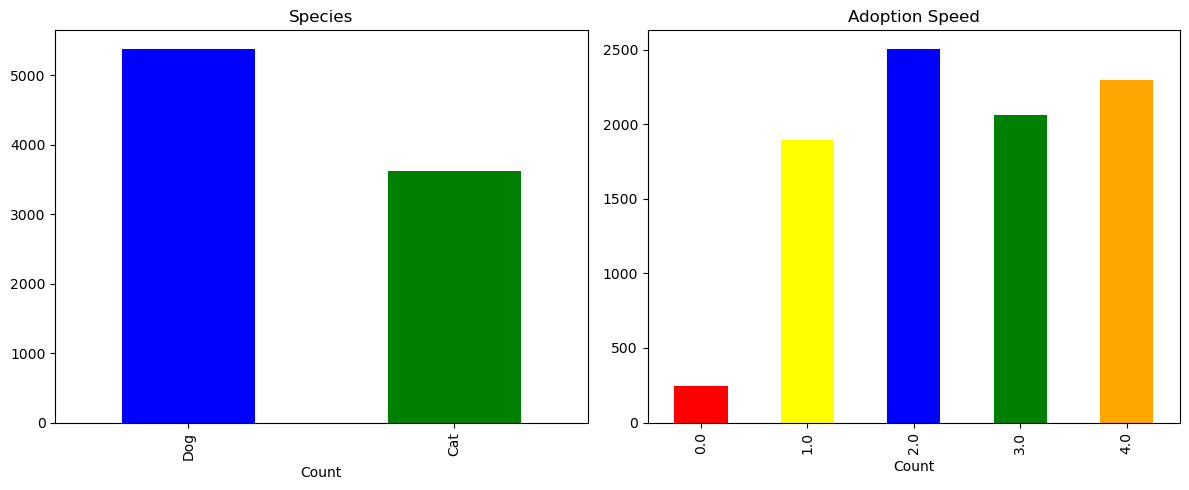

In [16]:
# display species graph
plt.subplot(1, 2, 1)
df_train_copy['Type'].value_counts().plot(kind='bar', figsize=(12,5),color=['blue','green'])

plt.title('Species')
plt.xlabel('Count')

# display adoption speed graph
plt.subplot(1, 2, 2)
df_train_copy['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar',color = ["red","yellow",'blue','green','orange'])
plt.title('Adoption Speed')
plt.xlabel('Count')
print(df_train_copy['AdoptionSpeed'].value_counts())

# minimize overlap
plt.tight_layout()
plt.show()

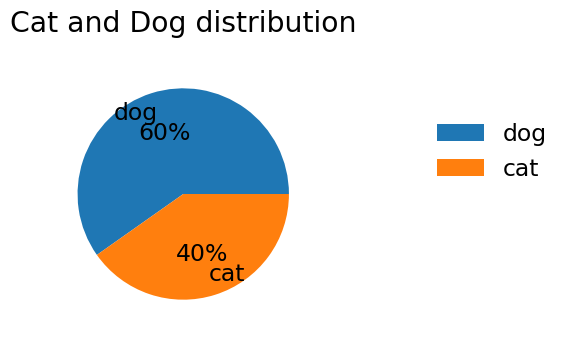

In [17]:
#https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a
fig, ax = plt.subplots(figsize=(3,4))
plt.rcParams['font.size']=17
#percent count
labels = ["dog","cat"]
percentages = [(df_train_copy[df_train_copy["Type"]=="Dog"].AdoptionSpeed.shape[0]*100)/df_train_copy.shape[0],
               (df_train_copy[df_train_copy["Type"]=="Cat"].AdoptionSpeed.shape[0]*100)/df_train_copy.shape[0]]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.6,labeldistance=0.8)
ax.axis('equal')
ax.set_title("Cat and Dog distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

The number of dog pet is higher than the number of cat in the training dataset

#### AdoptionSpeed ( Target   **Unbalanced**)

In [18]:
# Count observations per class
class_counts = df_train_copy['AdoptionSpeed'].value_counts()

# Display results
print(class_counts)

AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: count, dtype: int64


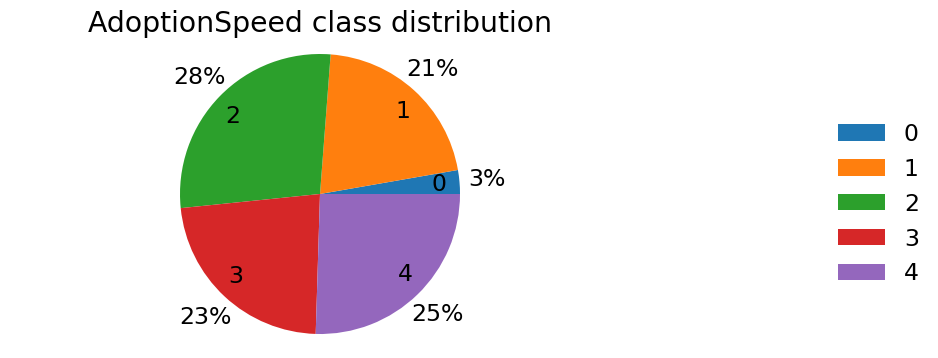

In [19]:
#https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a
fig, ax = plt.subplots(figsize=(8,4))
plt.rcParams['font.size']=17
#percent count
labels = ["0","1", "2", "3", "4"]
percentages = [(df_train_copy["AdoptionSpeed"].value_counts()[0]*100)/df_train_copy.shape[0],
               (df_train_copy["AdoptionSpeed"].value_counts()[1]*100)/df_train_copy.shape[0],
              (df_train_copy["AdoptionSpeed"].value_counts()[2]*100)/df_train_copy.shape[0],
              (df_train_copy["AdoptionSpeed"].value_counts()[3]*100)/df_train_copy.shape[0],
              (df_train_copy["AdoptionSpeed"].value_counts()[4]*100)/df_train_copy.shape[0]]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=0.8)
ax.axis('equal')
ax.set_title("AdoptionSpeed class distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

Conclusion:

- From above distribution plot it is clear that data is **imbalanced** and there is only one class that is extreme minor i.e, 0 which counts for only 3% of all the data which is very very small. Rest of other 4 classes have very similar distribution. So we'll have have to take care of minor class.

**Our dataset is imbalanced, let's handle this problem later**

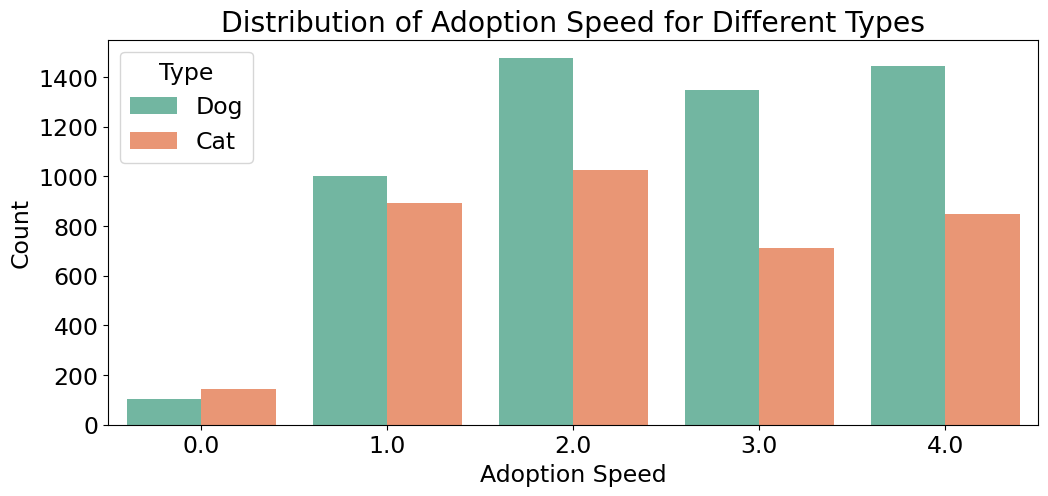

In [20]:
adoption_speed = df_train_copy['AdoptionSpeed'].value_counts()

plt.figure(figsize=(12, 5))
sns.countplot(x='AdoptionSpeed', hue='Type', data=df_train_copy,palette = "Set2")

plt.title('Distribution of Adoption Speed for Different Types')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.show()

This shows that most pet were most not likely adopted the same day they were listed and dogs are more likely to get adopted than cats

####  Pet Age feature


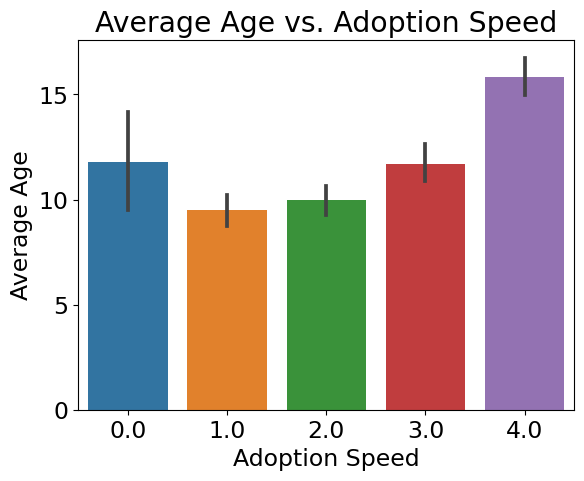

In [21]:
sns.barplot(x='AdoptionSpeed', y='Age', data=df_train_copy, estimator='mean')
plt.xlabel('Adoption Speed')
plt.ylabel('Average Age')
plt.title('Average Age vs. Adoption Speed')
plt.show()

In [22]:
print(len(df_train_copy.Age.value_counts()))
df_train_copy.Age.describe()

99


count    9000.000000
mean       11.809778
std        19.405099
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       255.000000
Name: Age, dtype: float64

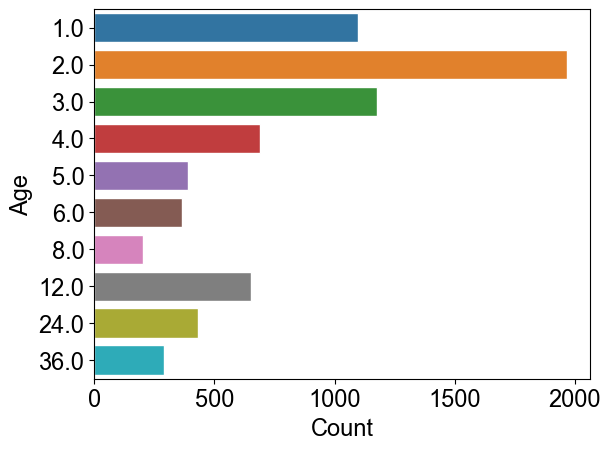

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axe = plt.subplots()
count_value = df_train_copy["Age"].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=count_value.values[0:10], y=count_value.index[0:10], orient="h", ax=axe)
plt.xlabel("Count")
plt.ylabel("Age")
plt.show()


- From above we can take a conclusion that around 75% of pets are between 1 to 12 months old only.
- It's a very commonsensical that age of pet is very important factor while adoption. So now we'll look at adoption speed with respect to age.

#### Pet Gender Feature

In [24]:
df_train_copy["Gender"].unique()

array(['Male', 'Female'], dtype=object)

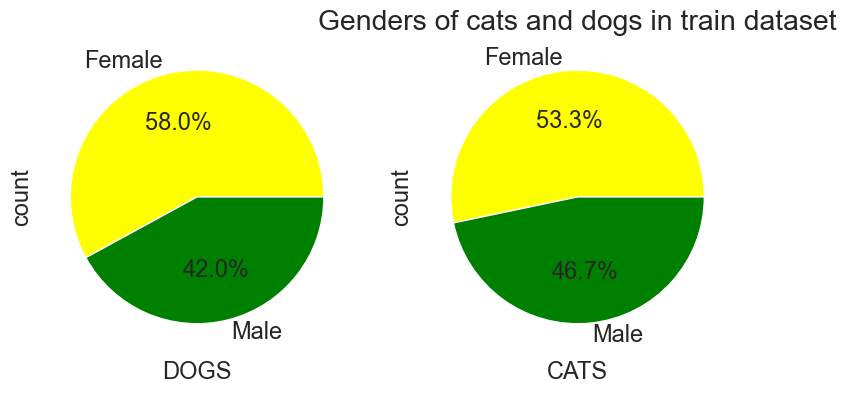

In [25]:
# # gender of pet 

import matplotlib.pyplot as plt

train_dog = df_train_copy[df_train_copy['Type'] == "Dog"]
train_cat = df_train_copy[df_train_copy['Type'] == "Cat"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7)) 

plt.title("Genders of cats and dogs in train dataset")

train_dog['Gender'].value_counts().plot(kind='pie', figsize=(9, 9), ax=ax1, colors=['yellow', 'green'], autopct='%1.1f%%')
train_cat['Gender'].value_counts().plot(kind='pie', figsize=(9, 9), ax=ax2, colors=['yellow', 'green'], autopct='%1.1f%%')

ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')

plt.show()


The gender distribution in test data is not bad. Females are greater in cats and dogs however the difference is not huge.

#### Breed Feature

In [26]:
# df_train_copy['Breed'].unique()

In [27]:
df_train_copy['Breed'].value_counts().head(10)

Breed
Mixed_Breed             3776
Domestic_Short_Hair     1866
Domestic_Medium_Hair     657
Tabby                    204
Siamese                  170
Persian                  144
Domestic_Long_Hair       143
Shih_Tzu                 138
Labrador_Retriever       138
Poodle                   130
Name: count, dtype: int64

From the image above we can see that in the training data, the number of mixed_breed is the highest breed among dog while the domestic short hair is the highest among cats

Text(0.5, 0, 'CATS')

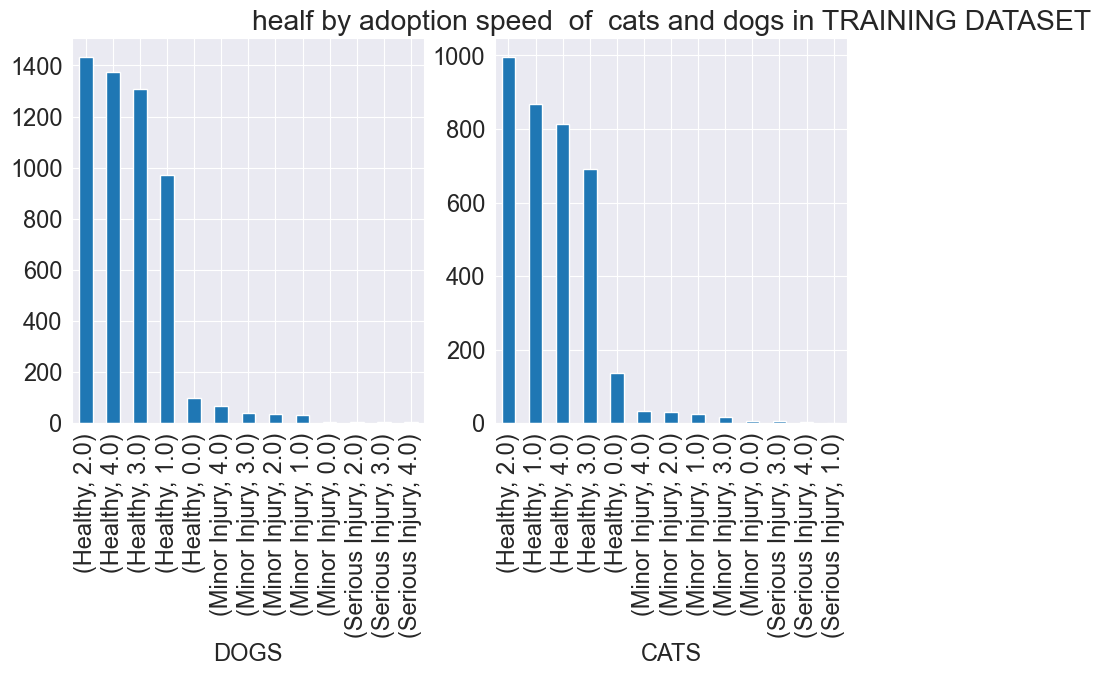

In [28]:
#train.groupby('Health')['Type'].value_counts().plot(kind='barh')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))  # 1 row, 2 columns
plt.title("healf by adoption speed  of  cats and dogs in TRAINING DATASET")
train_dog.groupby('Health')['AdoptionSpeed'].value_counts().plot(kind='bar',ax=ax1)
train_cat.groupby('Health')['AdoptionSpeed'].value_counts().plot(kind='bar',ax=ax2)
ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')

Heathy animals are most likely to get adopted

####  Fee Feature


In [29]:
df_train_copy.Fee.describe()


count    9000.000000
mean       24.431333
std        81.575346
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2000.000000
Name: Fee, dtype: float64

- Around 85% of total adoption posting have zero Fee.
- And there seems some outlier because max fee value is 2000 and that seems alot. We'll do some analysis on fee values.

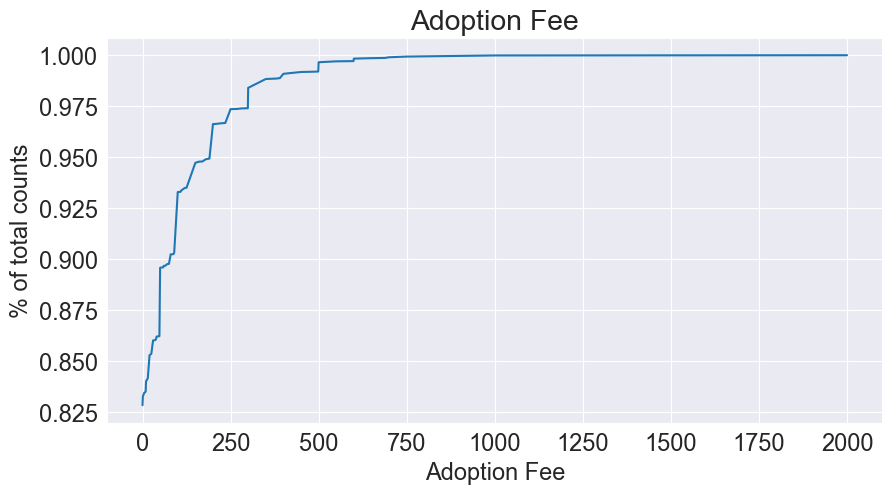

In [30]:
index = np.argsort(list(df_train_copy.Fee.value_counts().index))
#plotting
plt.figure(figsize=(10,5))
plt.plot(df_train_copy.Fee.value_counts().index[index],
        np.cumsum(df_train_copy.Fee.value_counts().values[index])/np.sum(df_train_copy.Fee.value_counts().values[index]))
plt.title("Adoption Fee")
plt.ylabel("% of total counts")
plt.xlabel("Adoption Fee")
plt.show()

- So from above it is clear that 99.99% of adoption have Fee below 1000 so we can discard rest of entries with Fee above 1000.

## Separating Numerical and Categorical columns

I am going to separate the numerical and categorical in different lists because later I would need to apply different trasformations to each type of column in the pipeline.
I am not goind to take into account the ``target, description and images`` columns because they are not numerical or categorical (technically, the target is categorical but it does not matter as we want to predict it and will not use it as part of our input data). 

I do not want ot change the original dataset so I will assign X (input data) and y (target) to different variables.

In [31]:
X = df_train_copy.drop('AdoptionSpeed', axis=1).copy()
y = np.array(df_train_copy['AdoptionSpeed']).reshape(-1,1)

In [32]:
numerical_columns_selector = selector(dtype_exclude=object) 
categorical_columns_selector = selector(pattern=r'^(?!.*(Description|Images))',dtype_include=object)
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [33]:
print("List of numerical columns: ",numerical_columns)
print("List of categorical columns: ", categorical_columns)

List of numerical columns:  ['Age', 'Fee']
List of categorical columns:  ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']


### Type is transformed converted it into cat = 0 and  dog=1  (Custom pipeline function)

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class TypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Type'] = X_transformed['Type'].map({'Dog': 1, 'Cat': 0})
        return X_transformed


In [35]:
# # Create the custom pipeline
# type_pipeline = Pipeline([
#     ('type_converter', TypeConverter())
# ])

# # Example usage:
# # Assuming df is your DataFrame with 'Gender' column
# transformed_df = type_pipeline.fit(X)

In [36]:
# type_pipeline.transform(X)

### Age is transformed  (Custom pipeline function)

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class AgeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, cat_scale=5, dog_scale=7):
        
        self.cat_scale = cat_scale
        self.dog_scale = dog_scale
    
    def fit(self, X, y=None):

        return self
    
    def transform(self, X):
        
        X_transformed = X.copy()
        
        # Apply the age conversion for cats
        X_transformed.loc[X_transformed['Type'] == 'Cat', 'Age'] = \
            X_transformed.loc[X_transformed['Type'] == 'Cat', 'Age'] / self.cat_scale
        
        # Apply the age conversion for dogs
        X_transformed.loc[X_transformed['Type'] == 'Dog', 'Age'] = \
            X_transformed.loc[X_transformed['Type'] == 'Dog', 'Age'] / self.dog_scale
        
        return X_transformed

### Gender = Male is converted to 0 and Female is converted to 1 (Custom pipeline function)

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

class GenderConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Gender'] = X_transformed['Gender'].map({'Male': 1, 'Female': 0})
        return X_transformed




In [39]:
# # Create the custom pipeline
# gender_pipeline = Pipeline([
#     ('gender_converter', GenderConverter())
# ])

# # Example usage:
# # Assuming df is your DataFrame with 'Gender' column
# transformed_df = gender_pipeline.transform(X)

## Ordinal Mapping   (MaturitySize)

Ordinal encoding, is a process of transforming categorical variables into numerical variables while preserving the order or hierarchy of the categories. We can apply it to columns of our dataset which are categorical at a first glance but which some kind of progression can be identified in the unique values of the column (such as a progression in size, age, etc).

To identify this, we need to study our columns' unique values.

The column ``MaturitySize`` is ordinal (there is a progression from small to extra large in its values), so we can map it as an ``ordinal column``.

### MaturitySize is converted into numerical  (Custom pipeline function)

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

class MaturitySizeConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2, 'Extra Large': 3}
        X_transformed['MaturitySize'] = X_transformed['MaturitySize'].map(size_mapping)
        return X_transformed

# Create the custom pipeline
maturity_size_pipeline = Pipeline([
    ('maturity_size_converter', MaturitySizeConverter())
])



## Text pre-processing

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
import nltk
import emoji
import string
# from spellchecker import SpellChecker
# from textblob import TextBlob
from nltk.stem import WordNetLemmatizer


In [42]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# stops = set(stopwords.words('english'))

In [43]:
# emoji handling
# !pip install emoji
import re

### clean description using TextCleaner  (Custom pipeline function)

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import pandas as pd

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Description'] = X_transformed['Description'].apply(self.clean_text1)
        return X_transformed
    
    def clean_text1(self, text):
        stop_words = set(stopwords.words('english'))
        
        # Initialize the WordNetLemmatizer
        lemmatizer = WordNetLemmatizer()
        
        # Remove emojis
        emoji_pattern = re.compile("["
                                    u"\U0001F600-\U0001F64F"  # emoticons
                                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                    u"\U0001F700-\U0001F77F"  # alchemical symbols
                                    u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                    u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                    u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                    u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                    u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                    u"\U00002702-\U000027B0"  # Dingbats
                                    u"\U000024C2-\U0001F251" 
                                    u"\U0001F910-\U0001F97A"
                                    u"\U0001F980-\U0001F9B0"
                                    u"\U0001F9C0-\U0001F9FF"
                                    u"\U0001FA60-\U0001FA6F"
                                    u"\U0001FA70-\U0001FAFF"
                                    u"\U00002600-\U000026FF"  # Miscellaneous Symbols
                                    u"\U00002700-\U000027BF"  # Dingbats
                                    u"\U00002B50"
                                    u"\U000023E9-\U000023FA"  # Miscellaneous Technical
                                    "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        # Tokenize the text
        text_tokens = word_tokenize(text)
        
        # Lemmatize the tokens and remove stop words
        lemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in text_tokens if word.lower() not in stop_words]
        
        # Join the lemmatized tokens back into a sentence
        cleaned_sentence = ' '.join(lemmatized_text)
        
        # Remove punctuation and extra whitespace
        cleaned_sentence = re.sub(r'[^\w\s]', '', cleaned_sentence).strip()
        
        return cleaned_sentence


##  IMAGE PRE-PROCESSING

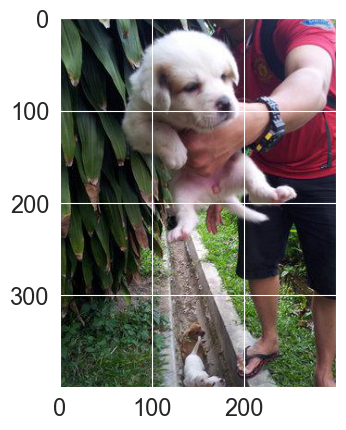

In [45]:
# Read the first image of the list
from skimage import io


img = io.imread(X['Images'][10])
# have a look to the image
plt.imshow(img)

In [46]:
# !pip install opencv-python
# !pip install opencv-contrib-python



In [47]:
# convert the image to grey levels 
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [48]:
# compute SIFT detector and descriptors
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)

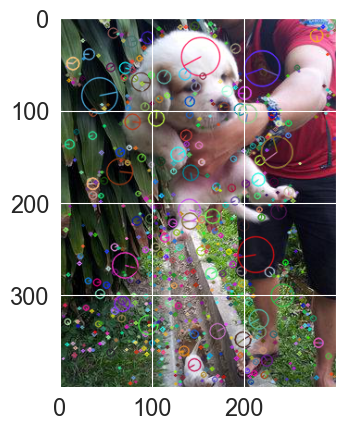

In [49]:
# plot image and descriptors
cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

## Extract features and build BOFs

In [50]:
from sklearn.base import BaseEstimator,TransformerMixin

In [51]:
import cv2
from sklearn.cluster import MiniBatchKMeans


SIFT (Scale-Invariant Feature Transform) is a feature extraction technique used in computer vision and image processing for detecting and describing local features in images. SIFT features are useful for a wide range of applications such as object recognition, image registration, 3D reconstruction, and image retrieval.

This code performs the following steps:

- ``Extracts Scale-Invariant Feature Transform (SIFT)`` features from a list of images and returns a list of these features.

- ``Builds a clusterizer`` (a clustering algorithm) using the list of extracted SIFT features and a desired number of clusters. The clusterizer is then fitted to the SIFT features and returned.

- ``Constructs a Bag of Features (BOF)`` representation using the list of SIFT features and the fitted clusterizer. The BOF representation is a histogram of the frequency of each cluster (i.e., visual word) in the SIFT features of an image.

In [52]:
import cv2

def extract_SIFT(img_lst):
    sift = sift = cv2.SIFT_create()
    sift_lst = []
    for img in img_lst:
        img=cv2.imread(img) #Load images
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert to gray scale
        kp, des = sift.detectAndCompute(gray, None) #Extract SIFT (Scale-Invariant Feature Transform) keypoints and descriptors
        sift_lst.append(des)
    
    return sift_lst

In [53]:
from sklearn.cluster import KMeans

def clusterize(SIFs, nb_cluster):
    sift_features = np.vstack(SIFs)#Stack the SIFT features
    clusterizer = KMeans(n_clusters=nb_cluster)# Create the KMeans clusterizer
    clusterizer.fit(sift_features)# Fit the clusterizer with the SIFT features
    return clusterizer


In [54]:
def build_BOFs(SIFTs, clusterizer):
    #Initialize the BOF representation
    bof_representation = np.zeros((len(SIFTs), clusterizer.n_clusters), dtype=np.float32)
    
    #Loop through the SIFT features
    for i, sift in enumerate(SIFTs):
        cluster_labels = clusterizer.predict(sift) #Predict the cluster labels for the SIFT features
        histogram = np.bincount(cluster_labels, minlength=clusterizer.n_clusters) #Create a histogram of cluster labels
        histogram = histogram / histogram.sum() #Normalize the histogram
        bof_representation[i, :] = histogram #Store the histogram in the BOF representation
    
    return bof_representation

In [55]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class BOF_extractor(BaseEstimator,TransformerMixin): # Initialise class MyImageTransformer and nb of clusters
    def __init__(self, nb_cluster=4):
        self.nb_cluster=4

    def fit(self, X, y=None): #Use function extract_SIFT(X) and clusterize(SIFTs, self.nb_cluster) to the input data
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(SIFTs, self.nb_cluster)
        
    def transform(self, X, y=None): #transform input images and return bof representation using build_BOFs()
        self.SIFTs = extract_SIFT(X)
        return build_BOFs(self.SIFTs, self.clusterizer)
    
    def fit_transform(self, X, y=None): #transform and fit the data using all the previously defined function
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(self.SIFTs, self.nb_cluster)
        return build_BOFs(self.SIFTs, self.clusterizer)
    

In [56]:
# # First step, extract the SIFTs of each image

# def extract_SIFT(img_lst):
#     nbSIFTs = 0    # Nomber of SIFTs
#     SIFTs = []  # List of SIFTs descriptors 
#     #dimImgs = []   # Nb of descriptors associated to each images

#     for pathImg in tqdm(img_lst, position=0, leave=True): 
#         img = io.imread(pathImg)
#         if len(img.shape)==2: # this is a grey level image
#             gray = img
#         else: # we expect the image to be a RGB image or RGBA
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         sift = cv2.SIFT_create()
#         kp, des = sift.detectAndCompute(gray, None)
#         if len(kp) == 0 and img.shape[2]==4: #some images are mask on alpha channel: we thus extract this channel if not kpts have been detected
#             gray = img[:,:,3]
#             sift = cv2.SIFT_create()
#             kp, des = sift.detectAndCompute(gray, None)
        
#         nbSIFTs += des.shape[0]
#         SIFTs.append(des)
#         #dimImgs.append(des.shape[0])
#     return nbSIFTs, SIFTs#, dimImgs


# # Step 2: clusterize the SIFT
# from sklearn.cluster import MiniBatchKMeans
# # performs clustering on SIFT descriptors using the MiniBatchKMeans algorithm he goal of 
# #clustering is to group similar descriptors together and reduce the dimensionality of the feature space.

# def clusterize(SIFTs, nb_img_features=5, verbose=False):
#     clusterizer = MiniBatchKMeans(n_clusters=nb_img_features)   # nb_img_features is a hyperparameter
#     # learning of the clustering
#     flat_list = SIFTs[0]
#     for des in SIFTs[1:]:
#         flat_list = np.concatenate((flat_list, des)) # concate
#         if verbose:
#             print("shape:", des.shape, flat_list.shape)
#     clusterizer.fit(flat_list)
#     # we now know the label of each SIFT descriptor
#     return clusterizer


# # Step 3: build the BOW representation of each images (i.e. construction of the BOFs)

# def build_BOFs(SIFTs, clusterizer, verbose=False):
#     ok, nok = 0, 0
#     #BOF initialization
#     nb_img_features = clusterizer.get_params()['n_clusters']# Get the number of clusters from the KMeans clusterizer
#     BOFs = np.empty(shape=(0, nb_img_features), dtype=int) #Initialize an empty numpy array with the appropriate shape and dtype for the BOFs

#     # Build label list
#     flat_list = SIFTs[0]
#     # Iterate over the remaining images in the dataset and concatenate their SIFT features into flat_list
#     for des in SIFTs[1:]:
#         flat_list = np.concatenate((flat_list, des))
#         if verbose:
#             print("shape:", des.shape, flat_list.shape)
#     labels = clusterizer.predict(flat_list)#Use the clusterizer to predict the cluster labels for each SIFT feature in flat_list

#     # loop on images
#     i = 0 # index for the loop on SIFTs
#     for des in SIFTs:
#         #initialisation of the bof for the current image
#         tmpBof = np.array([0]*nb_img_features)
#         j = 0
#         # for every SIFT of the current image:
#         nbs = des.shape[0]
#         while j < nbs:
#             tmpBof[labels[i]] += 1
#             j+=1
#             i+=1
#         BOFs = np.concatenate((BOFs, tmpBof.reshape(1,-1)), axis=0)
#     if verbose:
#         print("BOFs : ", BOFs)
    
#     return BOFs

# from sklearn.base import BaseEstimator,TransformerMixin


# def list_comparaison(l1, l2):
#     if not l1 is None \
#         and not l2 is None \
#         and len(l1)==len(l2) \
#         and len(l1)==sum([1 for i,j in zip(l1, l2) if i==j]):
#         return True
#     return False


# class BOF_extractor(BaseEstimator,TransformerMixin):
#     X = None
#     SIFTs = None
#     nbSIFTs = 0

#     def __init__(self, nb_img_features=5, verbose=False):
#         self.nb_img_features = nb_img_features
#         self.verbose = verbose
#        # self.path = project_path
#         if self.verbose:
#             print("BOF.init()")

#     def fit(self, X, y=None):
#         if self.verbose:
#             print("BOF.fit()")
#         if list_comparaison(X, self.X):
#             SIFTs = self.SIFTs
#             nbSIFTs = self.nbSIFTs
#         else:
#             if self.verbose:
#                 print("extract_SIFT")
#             nbSIFTs, SIFTs = extract_SIFT(X)
#         self.X = X
#         self.SIFTs = SIFTs
#         self.nbSIFTs = nbSIFTs
#         self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)

#     def transform(self, X, y=None):
#         if self.verbose:
#             print("BOF.transform()")
#         if list_comparaison(X, self.X):
#             SIFTs = self.SIFTs
#             nbSIFTs = self.nbSIFTs
#         else:
#             if self.verbose:
#                 print("extract_SIFT")
#             nbSIFTs, SIFTs = extract_SIFT(X)

#         if self.verbose:
#             print("nbSIFTs:", nbSIFTs)
#         return build_BOFs(SIFTs, self.clusterizer, self.verbose)

#     def fit_transform(self, X, y=None):
#         if self.verbose:
#             print("BOF.fit_transform()")
#         if list_comparaison(X, self.X):
#             SIFTs = self.SIFTs
#             nbSIFTs = self.nbSIFTs
#         else:
#             if self.verbose:
#                 print("extract_SIFT")
#             nbSIFTs, SIFTs = extract_SIFT(X)
#         self.X = X
#         self.SIFTs = SIFTs
#         self.nbSIFTs = nbSIFTs
#         self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
#         return build_BOFs(SIFTs, self.clusterizer, self.verbose)

## Pre-processing Pipeline  Create X and y(Target)


To achieve accurate machine learning results, it's important to use a balanced dataset. This means that the number of samples for each class in the dataset should be roughly the same. If the dataset is imbalanced, the machine learning model may be biased towards the majority class, leading to poor performance on the minority class.

To address this issue, my approach is to balance the dataset using a technique like RandomOverSampler.

- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

Performing ``cross-validation`` is a powerful method to evaluate the performance of a machine learning model. However, it can be computationally expensive, especially when the dataset is large. In this case, In my case I am facing a time constraint, and the computer takes a long time to perform cross-validation.

- https://scikit-learn.org/stable/modules/cross_validation.html

To optimize my time, I am planning to only perform cross-validation on the balanced dataset since this is the recommended approach. I will not perform cross-validation on the non-balanced dataset because I only want to compare its accuracy with the accuracy of the balanced dataset

In [57]:
#spliting the data into dependent and independent varaible

y = df_train_copy['AdoptionSpeed']
X = df_train_copy.drop(['AdoptionSpeed'], axis=1).copy()


In [58]:
y

0       4.0
1       3.0
2       1.0
3       4.0
4       3.0
       ... 
8995    2.0
8996    4.0
8997    3.0
8998    4.0
8999    1.0
Name: AdoptionSpeed, Length: 9000, dtype: float64

In [59]:
numerical_columns

['Age', 'Fee']

In [60]:
categorical_columns


['Type',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Breed']

In [61]:
import pandas as pd

features = X.columns.tolist()

numerical_features = [feature for feature in features if 
                X[feature].dtype != 'object' or feature == 'MaturitySize' or feature ==  'Gender' or feature == "Type"]
categorical_features = [feature for feature in features if
                X[feature].dtype == object and feature != "MaturitySize" and  feature != "Gender"   and  feature != "Description"
                        and  feature != "Images"  and  feature != "Color3" and  feature != "Type" ]


print(numerical_features)
# print("\n")

print(categorical_features)

['Type', 'Age', 'Gender', 'MaturitySize', 'Fee']
['Color1', 'Color2', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']


In [62]:
text_features = ['Description']
image_features = ['Images']
drop_features = ["Color3"]

In [63]:
#  checking the number of observations per classes
y.value_counts()

AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: count, dtype: int64

### Pipeline

- https://scikit-learn.org/1.4/modules/generated/sklearn.pipeline.Pipeline.html

In [64]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample


In [65]:
# Creating pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('stdscaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding categorical features
])

# Define pipeline for text features
text_transformer_pipeline = Pipeline(steps=[ ('vectorizer', CountVectorizer())])
image_transformer_pipeline = Pipeline(steps=[ ('img', BOF_extractor())])



col_transformer = ColumnTransformer(transformers=[
   ('drop_columns','drop',drop_features),

    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features),
    
    ('text-data', text_transformer_pipeline, 'Description'),
    ('image-data', image_transformer_pipeline, 'Images'),
    
    
])


    
my_sklearn_pipeline = Pipeline(steps=[
    ('TypeConverter', TypeConverter()),
    ('age', AgeConverter()),
    ('text_cleaner', TextCleaner()),
    ('MaturitySizeConverter' ,MaturitySizeConverter()),
    ("GenderConverter",GenderConverter()),

                 ('col_transformer',col_transformer),
    ]

                           )


In [66]:
my_sklearn_pipeline

Pipeline(steps=[('TypeConverter', TypeConverter()), ('age', AgeConverter()),
                ('text_cleaner', TextCleaner()),
                ('MaturitySizeConverter', MaturitySizeConverter()),
                ('GenderConverter', GenderConverter()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Color3']),
                                                 ('numerical',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['Type', 'A...Gender',
                                                   'MaturitySize', 'Fee']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Color1', 'Color2',
                                                   'FurLength', 'Vaccinated',
                                                   'Dewormed', 'Sterilized',
                                                   'Health', 'Breed']),
                                                 ('text-data',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer())]),
                                                  'Description'),
                                                 ('image-data',
                                                  Pipeline(steps=[('img',
                                                                   BOF_extractor())]),
                                                  'Images')]))])

In [67]:
# pipeline_final = Pipeline(steps=[
#     ('pipe',sklearn_pipeline),
#                           ])


In [68]:
# pipeline_final

### resample is used to balance the data by oversampling the minority class using sklearn resample

In [69]:
from sklearn.utils import resample
import pandas as pd

minority_class_label = 0.0
majority_class_label = [1.0, 2.0, 3.0, 4.0]

# Assuming df_train_copy is your DataFrame
majority_class = df_train_copy[df_train_copy['AdoptionSpeed'].isin(majority_class_label)]
minority_class = df_train_copy[df_train_copy['AdoptionSpeed'] == minority_class_label]

# Upsample minority class to match the length of the majority class
minority_upsampled = resample(minority_class,
                              replace=True,  # sample with replacement
                              n_samples=1700,  # to match majority class
                              random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_resampled = pd.concat([majority_class, minority_upsampled])

# Check class counts
print(df_resampled['AdoptionSpeed'].value_counts())


AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0    1700
Name: count, dtype: int64


**I will use this resampled data set for my model training**

# CROSS VALIDATION AND RANDOM SEARCH CV

### Train test split the balanced dataset with only 400 data for each class from the resampled data

In [237]:

unique_classes = df_resampled['AdoptionSpeed'].unique()  # Identify unique classes
selected_df = pd.DataFrame(columns=df_resampled.columns) # empty dataframe to store selected data

# Sample 200 data points from each class
for class_label in unique_classes:
    class_data = df_resampled[df_resampled['AdoptionSpeed'] == class_label]
    if len(class_data) < 400:
        selected_df = pd.concat([selected_df, class_data])
    else:
        sampled_data = class_data.sample(n=400, replace=False, random_state=42)
        selected_df = pd.concat([selected_df, sampled_data])

# Reset index of the selected dataframe
selected_df.reset_index(drop=True, inplace=True)

selected_df.head(1)

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,Dog,12.0,Female,Black,White,Unknown,Small,Yes,Yes,Yes,Yes,Healthy,0.0,Coco and her pup Bessie were rescued from a ho...,4.0,C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Mixed_Breed


In [238]:
selected_df['AdoptionSpeed'].value_counts()

AdoptionSpeed
4.0    400
3.0    400
1.0    400
2.0    400
0.0    400
Name: count, dtype: int64

In [239]:
# Separate features (X_resampled) and target variable (y_resampled)
X_selected_400 = selected_df.drop(columns=['AdoptionSpeed'])
y_selected_400 = selected_df['AdoptionSpeed']

In [240]:
# Split the data into train and validation set 
from sklearn.model_selection import train_test_split
X_train_400, X_val_400, y_train_400, y_val_400 = train_test_split(X_selected_400, y_selected_400, test_size=0.20, random_state=2022,stratify=y_selected_400)

### The different models with the best hyper parameters, after the cross validation. 

The RandomizedSearchCV I have done only with the balanced dataset, I haven't try even with the non balanced dataset because in my computer it takes more than one day and sometimes it froze and I needed to switch off the computer and start again.

Cross-validation with RandomizedSearchCV is a technique used to optimize the hyperparameters of a machine learning model using randomized search. RandomizedSearchCV is a function from the scikit-learn library that performs hyperparameter tuning using a combination of random search and cross-validation.

The process works by defining a range of hyperparameters and their potential values. RandomizedSearchCV then randomly selects a combination of hyperparameter values from this range and trains and evaluates the model using cross-validation. The process is repeated multiple times, each time selecting a different set of hyperparameter values.

The advantage of RandomizedSearchCV is that it can be more efficient than an exhaustive grid search of all possible hyperparameter combinations. By randomly sampling the hyperparameter space, RandomizedSearchCV can often find good hyperparameter values with fewer evaluations.

The output of RandomizedSearchCV is the best set of hyperparameters that was found during the search, along with the corresponding cross-validation score. These hyperparameters can then be used to train the final model on the entire dataset.

##### Models where I will train with balance dataset  (RandomizedSearchCV )

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define algorithms and their corresponding hyperparameters
param_distributions = {
    'RandomForestClassifier': {'randomforestclassifier__n_estimators': [50, 150],
                               'randomforestclassifier__max_depth': [15, 50], 
                               'randomforestclassifier__bootstrap': [True, False],
                              },
    'GradientBoostingClassifier': {'gradientboostingclassifier__n_estimators': [80, 100, 120], 'gradientboostingclassifier__learning_rate': [0.1, 0.2, 0.3]},
    'KNN_CLF': {'kneighborsclassifier__n_neighbors': [4, 5, 6]},
    'LogisticRegression': {'logisticregression__penalty':['l1', 'l2', 'elasticnet'], 
                           'logisticregression__C': [0.2, 0.5, 1.0, 2.0], 
                           'logisticregression__verbose': [1, 2, 3],
                          'logisticregression__max_iter': [1000] }
}




# Initialize classifiers
classifiers = {
    'GradientBoostingClassifier': make_pipeline(my_sklearn_pipeline, GradientBoostingClassifier()),
    'KNN_CLF': make_pipeline(my_sklearn_pipeline, KNeighborsClassifier()),
    'LogisticRegression': make_pipeline(my_sklearn_pipeline, LogisticRegression()),
    'RandomForestClassifier': make_pipeline(my_sklearn_pipeline, RandomForestClassifier())
}


In [71]:
classifiers

{'GradientBoostingClassifier': Pipeline(steps=[('pipeline',
                  Pipeline(steps=[('TypeConverter', TypeConverter()),
                                  ('age', AgeConverter()),
                                  ('text_cleaner', TextCleaner()),
                                  ('MaturitySizeConverter',
                                   MaturitySizeConverter()),
                                  ('GenderConverter', GenderConverter()),
                                  ('col_transformer',
                                   ColumnTransformer(transformers=[('drop_columns',
                                                                    'drop',
                                                                    ['Color3']),
                                                                   ('numerical',
                                                                    Pipeline(steps=[('stdscaler',
                                                                           

In [91]:
# X_train_400

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs=-1)


In [72]:
# Perform random search for each algorithm
best_params = {}
for algo, clf in classifiers.items():
    search = RandomizedSearchCV(clf, param_distributions[algo], n_iter=10, cv=5, random_state=42)
    search.fit(X_train_400, y_train_400)
    best_params[algo] = search.best_params_

# Print best parameters for each algorithm
for algo, params in best_params.items():
    print(f"Best parameters for {algo}: {params}")

100%|██████████████████████████████████████████████████████████████████████████████| 1280/1280 [00:54<00:00, 23.41it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s finished
100%|██████████████████████████████████████████████████████████████████████████████| 1280/1280 [01:07<00:00, 18.86it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished
100%|██████████████████████████████████████████████████████████████████████████████| 1280/1280 [01:24<00:00, 15.12it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
100%|██████████████████████████████████████████████████████████████████████████████| 1280/1280 [01:00<00:00, 21.06it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s finished
100%|██████████████████████████████████████████████████████████████████████████████| 1280/1280 [00:53<00:00, 23.85it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
100%|██████████████████████████████████████████████████████████████████████████████| 1280/1280 [00:59<00:00, 21.68it/s]
[Parallel(n_jobs=1)]: Using 

100%|██████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:59<00:00, 27.04it/s]


Best parameters for GradientBoostingClassifier: {'gradientboostingclassifier__n_estimators': 120, 'gradientboostingclassifier__learning_rate': 0.2}
Best parameters for KNN_CLF: {'kneighborsclassifier__n_neighbors': 4}
Best parameters for LogisticRegression: {'logisticregression__verbose': 1, 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 1000, 'logisticregression__C': 2.0}
Best parameters for RandomForestClassifier: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__bootstrap': True}


**Best Parameters**

- Best parameters for GradientBoostingClassifier: {'gradientboostingclassifier__n_estimators': 120, 'gradientboostingclassifier__learning_rate': 0.2}

:

- Best parameters for KNN_CLF: {'kneighborsclassifier__n_neighbors': 4}

:

- Best parameters for LogisticRegression: {'logisticregression__verbose': 1, 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 1000, 'logisticregression__C': 2.0}

:

- Best parameters for RandomForestClassifier: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__max_depth': 50, 'randomforestclassifier__bootstrap': True}

### Model Training using the whole Resampled train data

In [70]:
# Separate features (X_resampled) and target variable (y_resampled)
X_sampled = df_resampled.drop(columns=['AdoptionSpeed'])
y_sampled = df_resampled['AdoptionSpeed']

In [71]:
# Split the data into train and validation set 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_sampled, y_sampled, test_size=0.20, random_state=2024,stratify=y_sampled)

In [72]:
X_train.shape ,X_val.shape

((8362, 16), (2091, 16))

#### Pipeline is fitted using all data and stored in a variable for model training it will save time as its very hard to handel these 9000 images in my laptop

In [73]:
my_sklearn_pipeline

Pipeline(steps=[('TypeConverter', TypeConverter()), ('age', AgeConverter()),
                ('text_cleaner', TextCleaner()),
                ('MaturitySizeConverter', MaturitySizeConverter()),
                ('GenderConverter', GenderConverter()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Color3']),
                                                 ('numerical',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['Type', 'A...Gender',
                                                   'MaturitySize', 'Fee']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Color1', 'Color2',
                                                   'FurLength', 'Vaccinated',
                                                   'Dewormed', 'Sterilized',
                                                   'Health', 'Breed']),
                                                 ('text-data',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer())]),
                                                  'Description'),
                                                 ('image-data',
                                                  Pipeline(steps=[('img',
                                                                   BOF_extractor())]),
                                                  'Images')]))])

In [74]:
my_sklearn_pipeline.fit(X_train)

Pipeline(steps=[('TypeConverter', TypeConverter()), ('age', AgeConverter()),
                ('text_cleaner', TextCleaner()),
                ('MaturitySizeConverter', MaturitySizeConverter()),
                ('GenderConverter', GenderConverter()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Color3']),
                                                 ('numerical',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['Type', 'A...Gender',
                                                   'MaturitySize', 'Fee']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Color1', 'Color2',
                                                   'FurLength', 'Vaccinated',
                                                   'Dewormed', 'Sterilized',
                                                   'Health', 'Breed']),
                                                 ('text-data',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer())]),
                                                  'Description'),
                                                 ('image-data',
                                                  Pipeline(steps=[('img',
                                                                   BOF_extractor())]),
                                                  'Images')]))])

In [75]:
X_train_transformed = my_sklearn_pipeline.transform(X_train)


In [76]:
X_val_transformed  = my_sklearn_pipeline.transform(X_val)

In [77]:
X_val_transformed


<2091x14602 sparse matrix of type '<class 'numpy.float64'>'
	with 95318 stored elements in Compressed Sparse Row format>

In [78]:
X_train_transformed

<8362x14602 sparse matrix of type '<class 'numpy.float64'>'
	with 386463 stored elements in Compressed Sparse Row format>

In [79]:
X_train_transformed.shape,  X_val_transformed.shape

((8362, 14602), (2091, 14602))

In [80]:
import pandas as pd

dense_array = X_train_transformed.toarray()

df = pd.DataFrame(dense_array)



In [81]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,14592,14593,14594,14595,14596,14597,14598,14599,14600,14601
0,0.857657,3.624260,1.127681,1.994932,3.271429,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.230089,0.383481,0.300885,0.085546
1,0.857657,0.524276,-0.886775,0.226500,-0.291431,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.241736,0.260331,0.350207,0.147727
2,-1.165968,-0.147387,-0.886775,0.226500,-0.291431,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.141243,0.457627,0.259887,0.141243
3,0.857657,-0.509052,-0.886775,0.226500,-0.291431,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.253968,0.283730,0.341270,0.121032
4,0.857657,-0.405719,1.127681,0.226500,-0.291431,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.322769,0.066722,0.505838,0.104671


In [82]:
df.shape


(8362, 14602)

In [83]:
df.shape[0]


8362

In [84]:
import pandas as pd
dense_array_val = X_val_transformed.toarray()


df_val = pd.DataFrame(dense_array_val)


In [85]:
df_val


,0,1,2,3,4,5,6,7,8,9,...,14592,14593,14594,14595,14596,14597,14598,14599,14600,14601
0,0.857657,-0.405719,1.127681,0.226500,1.489999,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.195531,0.407821,0.273743,0.122905
1,0.857657,0.627609,1.127681,-1.541933,-0.291431,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.108696,0.500000,0.230978,0.160326
2,0.857657,0.007612,1.127681,0.226500,-0.291431,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.194595,0.329730,0.275676,0.200000
3,0.857657,-0.509052,-0.886775,0.226500,-0.291431,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.231884,0.277592,0.324415,0.166109
4,-1.165968,-0.457385,-0.886775,0.226500,-0.291431,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.304521,0.206117,0.336436,0.152926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,-1.165968,-0.457385,-0.886775,0.226500,-0.291431,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.477204,0.267477,0.112462
2087,0.857657,0.627609,-0.886775,0.226500,-0.291431,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.232843,0.289216,0.384804,0.093137
2088,0.857657,0.627609,-0.886775,-1.541933,2.083809,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.200297,0.320475,0.347181,0.132047
2089,-1.165968,0.317611,1.127681,0.226500,0.896189,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.194444,0.138889,0.125000,0.541667


In [86]:
df_val.shape


(2091, 14602)

## save the transformed data as csv so that I can use those during ml and dl training 

**X_train_transformed as df dataframe is stored in X_train_transformed_df.csv**

In [221]:
# df.to_csv('X_train_transformed_df.csv')


**X_val_transformed as df_val dataframe is stored in X_val_transformed_df.csv**

In [222]:
# df_val.to_csv('X_val_transformed_df.csv')


# Machine Learning Models 

##### Model training using LogisticRegression with best_params 


In [91]:
classifier_lr = LogisticRegression(verbose= 1,penalty = 'l2',max_iter= 1000, C =  3.0)


In [92]:
pipeline_final_lr = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('LogisticRegression_classifier',classifier_lr)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [93]:
pipeline_final_lr

Pipeline(memory='tmp/cache',
         steps=[('LogisticRegression_classifier',
                 LogisticRegression(C=3.0, max_iter=1000, verbose=1))])

In [94]:
pipeline_final_lr.fit(df,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


Pipeline(memory='tmp/cache',
         steps=[('LogisticRegression_classifier',
                 LogisticRegression(C=3.0, max_iter=1000, verbose=1))])

In [95]:

y_pred_lr=pipeline_final_lr.predict(df_val)


In [96]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_lr, average= 'weighted') 

0.45123501799193766

In [97]:
from sklearn.metrics import cohen_kappa_score

kp_lr=cohen_kappa_score(y_val,y_pred_lr)
kp_lr

0.3321045071036669

##### Model training using RandomForestClassifier with best_params 


In [98]:
classifier_rf = RandomForestClassifier(n_estimators= 50, max_depth= 50, bootstrap= True)

# model_rf = make_pipeline(my_sklearn_pipeline, classifier_rf)

In [99]:
pipeline_final_rf = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('RandomForest_Classifier',classifier_rf)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [100]:
pipeline_final_rf.fit(df,y_train)

Pipeline(memory='tmp/cache',
         steps=[('RandomForest_Classifier',
                 RandomForestClassifier(max_depth=50, n_estimators=50))])

In [101]:
y_pred_rf=pipeline_final_rf.predict(df_val)


In [102]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_rf, average= 'weighted') 

0.4989159751576958

In [103]:
from sklearn.metrics import cohen_kappa_score

kp_rf=cohen_kappa_score(y_val,y_pred_rf)
kp_rf

0.35268027108945443

##### Model training using GradientBoostingClassifier with best_params 


In [214]:
classifier_gb = GradientBoostingClassifier(n_estimators= 120, learning_rate = 0.2)

# model_gb = make_pipeline(my_sklearn_pipeline, classifier_gb)


In [215]:
pipeline_final_gb = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('GradientBoosting_Classifier',classifier_gb)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [216]:
pipeline_final_gb

Pipeline(memory='tmp/cache',
         steps=[('GradientBoosting_Classifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=120))])

In [217]:
pipeline_final_gb.fit(df,y_train)

Pipeline(memory='tmp/cache',
         steps=[('GradientBoosting_Classifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=120))])

In [218]:
y_pred_gb=pipeline_final_gb.predict(df_val)


In [219]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_gb, average= 'weighted') 

0.4475714227559323

In [220]:
from sklearn.metrics import cohen_kappa_score

kp_gb=cohen_kappa_score(y_val,y_pred_gb)
kp_gb

0.3082404373992985

##### Model training using KNeighborsClassifier with best_params 


In [104]:
classifier_knn = KNeighborsClassifier(n_neighbors= 4)

In [105]:

pipeline_final_knn = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('KNeighbors_Classifier',classifier_knn)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [106]:
pipeline_final_knn

Pipeline(memory='tmp/cache',
         steps=[('KNeighbors_Classifier', KNeighborsClassifier(n_neighbors=4))])

In [107]:
pipeline_final_knn.fit(df,y_train)

Pipeline(memory='tmp/cache',
         steps=[('KNeighbors_Classifier', KNeighborsClassifier(n_neighbors=4))])

In [108]:
y_pred_knn=pipeline_final_knn.predict(df_val)


In [109]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_knn, average= 'weighted') 

0.4066159109014933

In [110]:
from sklearn.metrics import cohen_kappa_score

kp_knn=cohen_kappa_score(y_val,y_pred_knn)
kp_knn

0.2843529540155082

### **Asthe highest kappa score I found by using Logistic Regression so finally I will use it  for the test data prediction**



In [87]:
df_test_copy

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Domestic_Short_Hair
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Mixed_Breed
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Mixed_Breed
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Mixed_Breed
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Domestic_Short_Hair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cat,4.0,Male,Yellow,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,A very friendly kitty! and it likes to follow ...,C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Domestic_Short_Hair
496,Dog,1.0,Female,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Female puppy for adoption, 6 weeks Please call...",C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Mixed_Breed
497,Cat,10.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,100.0,"Mimi had a hard start to life, she was raped a...",C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Domestic_Short_Hair
498,Cat,12.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,120.0,"When I found her last year, her mouth is bleed...",C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...,Domestic_Short_Hair


In [88]:
df_test_copy["Images"][0]

'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\5df99d229-2.jpg'

In [89]:
df_test_copy_transformed = my_sklearn_pipeline.transform(df_test_copy)

In [90]:
import pandas as pd
dense_array_test = df_test_copy_transformed.toarray()


df_test_copy_transformed_dataframe = pd.DataFrame(dense_array_test)


# save the transformed training data as csv so that I can use those during ml and dl training


# df_test_copy_transformed as df_test_copy_transformed_dataframe dataframe is stored in df_test_copy_transformed_dataframe_df.csv

In [111]:
df_test_copy_transformed_dataframe.to_csv('df_test_copy_transformed_dataframe_df.csv')


# Like I said before, I had the best kappa score with Logistic Regression I choose it as the best model.

In [112]:
y_pred_logistic_true = pipeline_final_lr.predict(df_test_copy_transformed_dataframe)


In [113]:
y_pred_random_true = pipeline_final_rf.predict(df_test_copy_transformed_dataframe)


In [114]:
y_pred_knn_true = pipeline_final_knn.predict(df_test_copy_transformed_dataframe)


In [116]:
y_pred_gbc_true = pipeline_final_gb.predict(df_test_copy_transformed_dataframe)

In [ ]:
models_pred = {}
models_pred['logistic'] = y_pred_logistic_true
models_pred['random'] = y_pred_random_true
models_pred['knn'] = y_pred_knn_true
models_pred['gbc'] = y_pred_gbc_true
models_pred['best_gbc'] = y_pred_gbc_true

In [ ]:
df_final_result_test_all = pd.DataFrame(models_pred)
print(df_final_result_test_all)

In [ ]:
# df = pd.DataFrame(y_pred_logistic_true)
# print(df)

In [ ]:
df_final_result_test_all.to_csv('df_final_result_test_all.csv')

In [ ]:
df_final_result_test_all['logistic'].to_csv('df_final_result_test_logistic_reg.csv', index=False)

# Deep Learning Model

In [181]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense


In [182]:
model_dl1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = (None,df.shape[1]),activation='relu'),
    keras.layers.Dropout(.3),
    tf.keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(.2),
    tf.keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(.1),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
])


In [183]:
model_dl1.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, None, 200)           │       2,920,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, None, 200)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, None, 150)           │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, None, 150)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, None, 100)           │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, None, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, None, 50)            │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, None, 5)             │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,971,155 (11.33 MB)

 Trainable params: 2,971,155 (11.33 MB)

 Non-trainable params: 0 (0.00 B)

In [184]:
model_dl1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [190]:
X_train_transformed_dense = X_train_transformed.toarray()


(8362, 14602)

In [191]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history_model_dl1 = model_dl1.fit(df, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/50


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model_dl2 = Sequential([
    Input(shape=(X_train_transformed.shape[1],)),
    Dense(1024, activation='relu'),
    Dropout(0.3),
        Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])


In [138]:
model_dl2.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 1024)                │      14,953,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,652,997 (59.71 MB)

 Trainable params: 15,652,997 (59.71 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
model_dl2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [140]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history_model_dl2 = model_dl2.fit(df, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.2399 - loss: 1.5799 - val_accuracy: 0.4035 - val_loss: 1.2597
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 33s 158ms/step - accuracy: 0.4460 - loss: 1.2168 - val_accuracy: 0.4447 - val_loss: 1.1412
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 32s 153ms/step - accuracy: 0.5443 - loss: 0.9937 - val_accuracy: 0.4591 - val_loss: 1.1676
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 32s 154ms/step - accuracy: 0.6426 - loss: 0.7922 - val_accuracy: 0.4931 - val_loss: 1.2575
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 33s 157ms/step - accuracy: 0.7455 - loss: 0.6358 - val_accuracy: 0.4967 - val_loss: 1.3827
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 34s 163ms/step - accuracy: 0.8476 - loss: 0.4294 - val_accuracy: 0.4871 - val_loss: 1.6474
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 33s 157ms/step - accuracy: 0.8984 - loss: 0.2874 - val_accuracy: 0.4794 - val_loss: 1.7637


In [141]:
y_pred_val_model_dl2 = model_dl2.predict(df_val)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [142]:
predicted_class_model_dl2 = np.argmax(y_pred_val_model_dl2, axis=1)
predicted_class_model_dl2

array([4, 3, 4, ..., 0, 4, 3], dtype=int64)

In [143]:
from sklearn.metrics import cohen_kappa_score

kp_model_dl2=cohen_kappa_score(y_val,predicted_class_model_dl2)
kp_model_dl2

0.27535757188167065

In [148]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model_dl3 = Sequential([
    Input(shape=(X_train_transformed.shape[1],)),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(5, activation='softmax')
])


In [149]:
model_dl3.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 1024)                │      14,953,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 15,661,061 (59.74 MB)

 Trainable params: 15,657,029 (59.73 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [150]:
model_dl3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [151]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history_model_dl3 = model_dl3.fit(df, y_train, epochs=15, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 58s 228ms/step - accuracy: 0.2290 - loss: 18.7061 - val_accuracy: 0.2188 - val_loss: 14.0425
Epoch 2/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 46s 218ms/step - accuracy: 0.3388 - loss: 12.2037 - val_accuracy: 0.2977 - val_loss: 8.5486
Epoch 3/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 51s 243ms/step - accuracy: 0.4214 - loss: 7.3139 - val_accuracy: 0.4023 - val_loss: 5.2049
Epoch 4/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 245ms/step - accuracy: 0.4825 - loss: 4.6252 - val_accuracy: 0.4459 - val_loss: 3.6730
Epoch 5/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 55s 263ms/step - accuracy: 0.5097 - loss: 3.3825 - val_accuracy: 0.4345 - val_loss: 3.0250
Epoch 6/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 60s 285ms/step - accuracy: 0.5008 - loss: 2.7587 - val_accuracy: 0.4716 - val_loss: 2.6563
Epoch 7/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 60s 285ms/step - accuracy: 0.5235 - loss: 2.5965 - val_accuracy: 0.4507 - val_loss: 2.6332
Epoch 8/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 56s 265ms/step - accuracy: 0.5345 - loss

In [152]:
y_pred_val_model_dl3 = model_dl3.predict(df_val)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [153]:
y_pred_val_model_dl3.shape


(2091, 5)

In [154]:
predicted_class_model_dl3 = np.argmax(y_pred_val_model_dl3, axis=1)
predicted_class_model_dl3

array([2, 4, 4, ..., 0, 4, 4], dtype=int64)

In [155]:
from sklearn.metrics import cohen_kappa_score

kp_model_dl3=cohen_kappa_score(y_val,predicted_class_model_dl3)
kp_model_dl3

0.29578534723472394

In [158]:
X_train_transformed

<8362x14602 sparse matrix of type '<class 'numpy.float64'>'
	with 386463 stored elements in Compressed Sparse Row format>

In [159]:
X_train_transformed_dense = X_train_transformed.toarray()


In [160]:
X_train_transformed_dense.shape

(8362, 14602)

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


X_train_transformed_dense_reshaped = X_train_transformed_dense.reshape(X_train_transformed_dense.shape[0], X_train_transformed_dense.shape[1], 1)
# X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_transformed_dense.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])



In [162]:

# Compile the model
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [164]:
# Train the model
history_cnn = model_cnn.fit(X_train_transformed_dense_reshaped, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)



Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.2352 - loss: 1.5956 - val_accuracy: 0.3945 - val_loss: 1.4093
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.4040 - loss: 1.3855 - val_accuracy: 0.4644 - val_loss: 1.2287
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5062 - loss: 1.1808 - val_accuracy: 0.4818 - val_loss: 1.1444
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.5790 - loss: 1.0317 - val_accuracy: 0.5057 - val_loss: 1.1164
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6390 - loss: 0.8951 - val_accuracy: 0.4913 - val_loss: 1.1337
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.6962 - loss: 0.8071 - val_accuracy: 0.5033 - val_loss: 1.1609
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7239 - loss: 0.7213 - val_accuracy: 0.5033 - val_loss: 1.1929
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.7655 - loss: 0.6276 - val_accu

In [165]:
X_val_transformed_dense = X_val_transformed.toarray()
X_val_transformed_dense.shape

(2091, 14602)

In [166]:
y_pred_val_model_cnn = model_dl3.predict(X_val_transformed_dense)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [167]:
predicted_class_model_cnn = np.argmax(y_pred_val_model_cnn, axis=1)
predicted_class_model_cnn

array([2, 4, 4, ..., 0, 4, 4], dtype=int64)

In [168]:
from sklearn.metrics import cohen_kappa_score

kp_model_dl3=cohen_kappa_score(y_val,predicted_class_model_cnn)
kp_model_dl3

0.29578534723472394

In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your X_train_transformed_dense has the shape (num_samples, num_features)
# You need to reshape it to have the shape (num_samples, sequence_length, num_features)
X_train_transformed_dense_reshaped = X_train_transformed_dense.reshape(X_train_transformed_dense.shape[0], 1, X_train_transformed_dense.shape[1])

# Build the Bidirectional LSTM model
model_lstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_transformed_dense_reshaped.shape[1], X_train_transformed_dense_reshaped.shape[2])),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model_lstm.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train_transformed_dense_reshaped, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.2295 - loss: 1.5964 - val_accuracy: 0.3969 - val_loss: 1.4914
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.3921 - loss: 1.4096 - val_accuracy: 0.4614 - val_loss: 1.2029
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.5283 - loss: 1.1160 - val_accuracy: 0.4818 - val_loss: 1.1638
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.6302 - loss: 0.9266 - val_accuracy: 0.4871 - val_loss: 1.2285
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.6988 - loss: 0.7755 - val_accuracy: 0.4758 - val_loss: 1.3251
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.7536 - loss: 0.6484 - val_accuracy: 0.4883 - val_loss: 1.4615
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.7961 - loss: 0.5560 - val_accuracy: 0.4746 - val_loss: 1.6119
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.8285 - loss: 0